In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install matplotlib

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("/home/chirag/jupyter/be_class/Datasets/Wholesale customers data.csv");

display(df.head())


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [6]:
df.drop(['Channel','Region'],axis=1,inplace=True)

<Axes: >

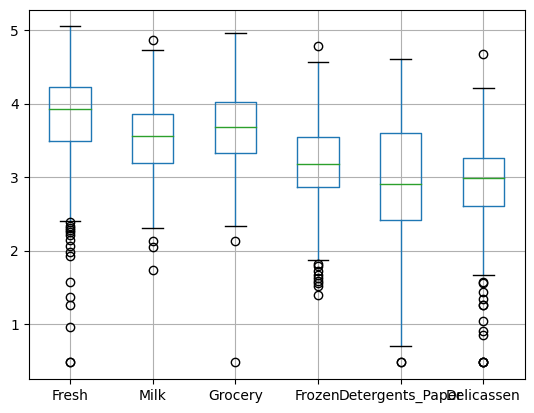

In [7]:
df.apply(np.log10).boxplot()

In [8]:
array = df.values

In [9]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

In [10]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [11]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [24]:
dbscan = DBSCAN(eps=1.8, min_samples=4)
dbscan.fit(X)
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
cl = pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [26]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [27]:
clustered = pd.concat([df,cl],axis=1)

In [28]:
clustered[clustered['cluster']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster


In [29]:
clustered

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,0
2,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,0
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0
4,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0,0
...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,0
996,NaN,NaN,NaN,NaN,NaN,NaN,0
997,NaN,NaN,NaN,NaN,NaN,NaN,0
998,NaN,NaN,NaN,NaN,NaN,NaN,0


In [30]:
a=0
while a<5:
  print(a)
  a=a+1
  

0
1
2
3
4


In [31]:
clustered.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
cluster                 0.000000
dtype: float64

In [32]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt


X, y = make_moons(1000, )
X = X + np.random.rand(1000, 2)*0.4

plt.scatter(X[:,0], X[:,1], c=y)

In [33]:
X.shape

(1000, 2)

In [34]:
min_samples

17

In [35]:
eps = np.random.rand(10) * 0.15

# m.fit(X)

# preds = m.labels_

epsilons = 0.05 + np.random.rand(5) * 0.10
min_samples_list = np.random.randint(3, 25, size=len(eps))

fig, ax = plt.subplots(5, 5, figsize=(20, 20))

ax = ax.flat

for epsilon in epsilons:
  for min_samples in min_samples_list:
    m = DBSCAN(eps=epsilon, min_samples=min_samples)
    m.fit(X)
    preds = m.labels_
    axis = next(ax)
    axis.scatter(X[:,0], X[:,1], c=preds)
    axis.set_title(f'{epsilon}, {min_samples}')

StopIteration: 